## Importing and prepping data

In [1]:
import pandas as pd

import diff_classifier.aws as aws
import diff_classifier.pca as pca

import os
import diff_classifier.imagej as ij
import boto3
import os.path as op
import diff_classifier.aws as aws
import diff_classifier.knotlets as kn
import numpy as np
from sklearn.externals import joblib

In [2]:
features = []
#featofvar = 'Type and Serum'

remote_folder = '09_19_19_size_dependent_study_2' #Folder in AWS S3 containing files to be analyzed
bucket = 'mckenna.data'
vids = 5
types = ['40', '200']
slices = [1, 2, 3, 4]
extras = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1']

counter = 0
for typ in types:
    for slic in slices:
        for num in range(1, vids+1):
            try:
                filename = 'features_40red_200YG_{}_w{}_v{}.csv'.format(typ, slic, num)
                print(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1")
                
                for extra in extras:
                    fstats[extra] = fstats.index
                fstats = fstats.drop(extras, axis=1)
                
                print('{} size: {}'.format(filename, fstats.shape))
                if '40' in typ:
                    fstats['Size'] = pd.Series(fstats.shape[0]*['40'], index=fstats.index)
                else:
                    fstats['Size'] = pd.Series(fstats.shape[0]*['200'], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                fstats['Well Number'] = pd.Series(fstats.shape[0]*[slic], index=fstats.index)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('Skipped!: {}'.format(filename))

features_40red_200YG_40_w1_v1.csv
features_40red_200YG_40_w1_v1.csv size: (1844, 67)
features_40red_200YG_40_w1_v2.csv
features_40red_200YG_40_w1_v2.csv size: (1906, 67)
features_40red_200YG_40_w1_v3.csv
features_40red_200YG_40_w1_v3.csv size: (2633, 67)
features_40red_200YG_40_w1_v4.csv
features_40red_200YG_40_w1_v4.csv size: (703, 67)
features_40red_200YG_40_w1_v5.csv
features_40red_200YG_40_w1_v5.csv size: (671, 67)
features_40red_200YG_40_w2_v1.csv
features_40red_200YG_40_w2_v1.csv size: (11363, 67)
features_40red_200YG_40_w2_v2.csv
features_40red_200YG_40_w2_v2.csv size: (10500, 67)
features_40red_200YG_40_w2_v3.csv
features_40red_200YG_40_w2_v3.csv size: (10796, 67)
features_40red_200YG_40_w2_v4.csv
features_40red_200YG_40_w2_v4.csv size: (12751, 67)
features_40red_200YG_40_w2_v5.csv
features_40red_200YG_40_w2_v5.csv size: (11729, 67)
features_40red_200YG_40_w3_v1.csv
features_40red_200YG_40_w3_v1.csv size: (8493, 67)
features_40red_200YG_40_w3_v2.csv
features_40red_200YG_40_w3_v

In [24]:
nonnum = ['Size', 'Well Number', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y', 'Quality',
          'Mean_Intensity', 'SN_Ratio', 'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality', 'Mean SN_Ratio',
          'Std SN_Ratio', 'binx', 'biny', 'bins', 'index']
nonnum = ['Size', 'Well Number', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y', 'Quality',
          'Mean_Intensity', 'SN_Ratio', 'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality', 'Mean SN_Ratio',
          'Std SN_Ratio', 'binx', 'biny', 'bins', 'index', 'Mean alpha', 'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis',
          'Std kurtosis', 'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2', 'Std asymmetry2', 'Mean asymmetry3',
          'Std asymmetry3', 'Mean AR', 'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness', 'Std boundedness',
          'Mean fractal_dim', 'Std fractal_dim', 'Mean trappedness', 'Std trappedness', 'Mean efficiency', 'Std efficiency',
          'Mean straightness', 'Std straightness', 'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
          'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2']

In [21]:
fstats_tot.columns

Index(['Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2',
       'asymmetry3', 'AR', 'elongation', 'boundedness', 'fractal_dim',
       'trappedness', 'efficiency', 'straightness', 'MSD_ratio', 'frames', 'X',
       'Y', 'Quality', 'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2',
       'Mean alpha', 'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis',
       'Std kurtosis', 'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality',
       'Mean Mean_Intensity', 'Std Mean_Intensity', 'M

## Train-Test Split

In [4]:
bins = list(range(0, 2048+1, 256))
fstats_tot['binx'] = pd.cut(fstats_tot.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['biny'] = pd.cut(fstats_tot.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['bins'] = 8*fstats_tot['binx'] + fstats_tot['biny']
fstats_tot = fstats_tot[np.isfinite(fstats_tot.bins)]
fstats_tot.bins = fstats_tot.bins.astype(int)

In [5]:
def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [6]:
f_train = fstats_tot[fstats_tot.bins.isin(checkerboard(8))].reset_index()
f_test = fstats_tot[~fstats_tot.bins.isin(checkerboard(8))].reset_index()

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [126]:
ncomp = 6
pcadataset = pca.pca_analysis(f_train, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.3753421388870251
1 component: 0.503445737463212
2 component: 0.6154937056805653
3 component: 0.7064830992937345
4 component: 0.7743303166841216
5 component: 0.8278727124673473


In [27]:
pcadataset.prcomps

,0,1,2,3,4,5
0,asymmetry2,straightness,D_fit,frames,Deff2,kurtosis
1,asymmetry3,MSD_ratio,kurtosis,boundedness,kurtosis,Deff2
2,asymmetry1,asymmetry3,alpha,trappedness,efficiency,MSD_ratio
3,elongation,AR,frames,D_fit,straightness,D_fit
4,fractal_dim,efficiency,Deff1,alpha,fractal_dim,frames


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [127]:
pca_train = pcadataset

In [128]:
pca_test = pca.pca_analysis(f_test, dropcols=nonnum, n_components=ncomp, existing_model=True, model_file=pca_train)

In [11]:
kmostat = pca.kmo(pca_train.scaled)

0.889436947334


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [30]:
import numpy as np
featofvar = 'Size'
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='40'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='200'].values[:, -ncomp:], axis=0)

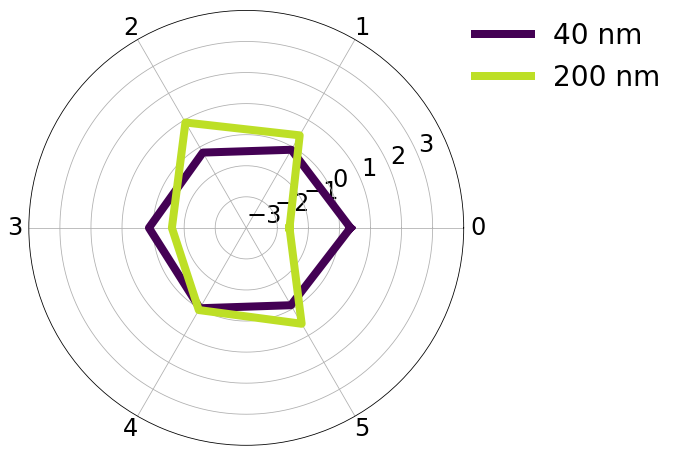

In [33]:
labels2 = ['40 nm', '200 nm']
pca.plot_pca(dicti, savefig=True, labels=labels2, rticks=np.linspace(-3, 3, 7), dpi=1200, labelsize=24,
             filename='pics/size_mixed_40red_200YG_pcaavg_small.png')

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 2)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(loc='upper right', prop={'size': 18})
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

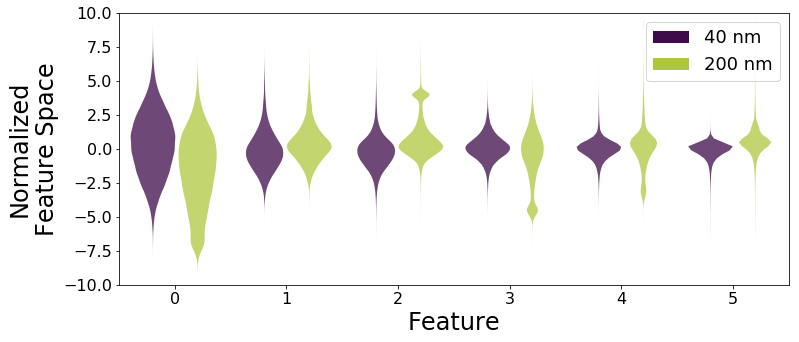

In [35]:
labels3 = ['40 nm', '200 nm']
labels = ['40', '200']
feats = feature_violin(pcadataset.final, label='Size', lvals=labels, labels=labels3, fsubset=ncomp, yrange=[-10, 10],
                       legendfontsize=18, labelsize=24, fname='./pics/size_mixed_40red_200YG_pcadist_small.png')

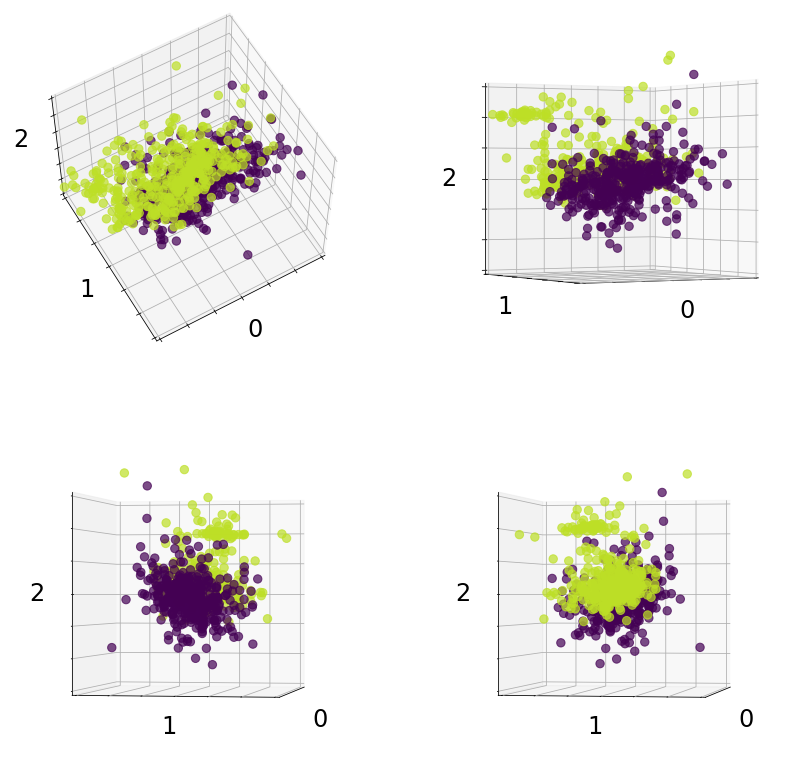

In [37]:
fstats1 = pca.feature_plot_3D(pca_train.final, label=featofvar, lvals=labels, randcount=400, ylim=[-6, 6],
                              xlim=[-6,6], zlim=[-6, 6], legendfontsize=24, labelfontsize=24, dpi=1600,
                              ticksize=20,
                              fname='./pics/size_mixed_40red_200YG_3feats_small.png')

## Neural Network

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [175]:
size_200 = pca_train.final[pca_train.final['Size'] == '200'].shape[0]
size_tbd = int(size_about+500*np.random.random(1)[0])

In [176]:
size_40 = pca_train.final[pca_train.final['Size'] == '40'].shape[0]
size_40

111804

In [195]:
fstats_tot.columns.values

array(['Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1',
       'asymmetry2', 'asymmetry3', 'AR', 'elongation', 'boundedness',
       'fractal_dim', 'trappedness', 'efficiency', 'straightness',
       'MSD_ratio', 'frames', 'X', 'Y', 'Quality', 'Mean_Intensity',
       'SN_Ratio', 'Deff1', 'Deff2', 'Mean alpha', 'Std alpha',
       'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality',
       'Mean Mean_Intensity', 'Std Mean_Intensi

In [177]:
pca_train.final.shape

(136393, 80)

In [178]:
size_tbd = int(size_about+500*np.random.random(1)[0])
pca_train1 = pd.concat([pca_train.final[pca_train.final['Size'] == '40'].sample(n=size_tbd), pca_train.final[pca_train.final['Size'] == '200']], axis=0, ignore_index=True)

size_tbd = int(size_about+500*np.random.random(1)[0])
pca_test1 = pd.concat([pca_test.final[pca_test.final['Size'] == '40'].sample(n=size_tbd), pca_test.final[pca_test.final['Size'] == '200']], axis=0, ignore_index=True)

In [179]:
X_train = pca_train1.values[:, -ncomp:]
X_test = pca_test1.values[:, -ncomp:]
y_train = pca_train1[featofvar].values
y_test = pca_test1[featofvar].values

In [180]:
for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.39591664
Validation score: 0.839619
Iteration 2, loss = 0.36407884
Validation score: 0.842863
Iteration 3, loss = 0.35906984
Validation score: 0.844079
Iteration 4, loss = 0.35619717
Validation score: 0.842863
Iteration 5, loss = 0.35385419
Validation score: 0.845296
Iteration 6, loss = 0.35190909
Validation score: 0.843066
Iteration 7, loss = 0.35046355
Validation score: 0.845499
Iteration 8, loss = 0.34846415
Validation score: 0.846918
Iteration 9, loss = 0.34689234
Validation score: 0.845702
Iteration 10, loss = 0.34570983
Validation score: 0.850973
Iteration 11, loss = 0.34427350
Validation score: 0.850162
Iteration 12, loss = 0.34217763
Validation score: 0.848337
Iteration 13, loss = 0.34156070
Validation score: 0.847526
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 14, loss = 0.33812050
Validation score: 0.853406
Iteration 15, loss = 0.33767151
Validation score: 0.853204
Iterat

In [70]:
X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

In [38]:
for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.26650957
Validation score: 0.899267
Iteration 2, loss = 0.24828354
Validation score: 0.902639
Iteration 3, loss = 0.24551186
Validation score: 0.902859
Iteration 4, loss = 0.24347784
Validation score: 0.903739
Iteration 5, loss = 0.24172076
Validation score: 0.904692
Iteration 6, loss = 0.24045947
Validation score: 0.905645
Iteration 7, loss = 0.23881803
Validation score: 0.905865
Iteration 8, loss = 0.23755961
Validation score: 0.905205
Iteration 9, loss = 0.23652967
Validation score: 0.908651
Iteration 10, loss = 0.23543886
Validation score: 0.905132
Iteration 11, loss = 0.23461538
Validation score: 0.907258
Iteration 12, loss = 0.23360104
Validation score: 0.908138
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 13, loss = 0.23121275
Validation score: 0.906525
Iteration 14, loss = 0.23094601
Validation score: 0.908431
Iteration 15, loss = 0.23062687
Validation score: 0.909018
Iterat

In [40]:
X_train = pca_train.final
X_test = pca_test.final

In [181]:
X_train = pca_train1
X_test = pca_test1
y_train = pca_train1[featofvar].values
y_test = pca_test1[featofvar].values

In [182]:
X_train['LogDeff1'] = np.log(X_train['Deff1']).replace([np.inf, -np.inf], np.nan)
X_test['LogDeff1'] = np.log(X_test['Deff1']).replace([np.inf, -np.inf], np.nan)

In [183]:
kb = 1.381*10**-23
T = 310
nu = 0.000797
sizes = ['40', '200']
sizesbins = np.array([120])
lambd = 1.33

logDeff = np.log(10**9*10**12*kb*T/(lambd**2*sizesbins*3*np.pi*nu))
print(logDeff)

[ 0.98767406]


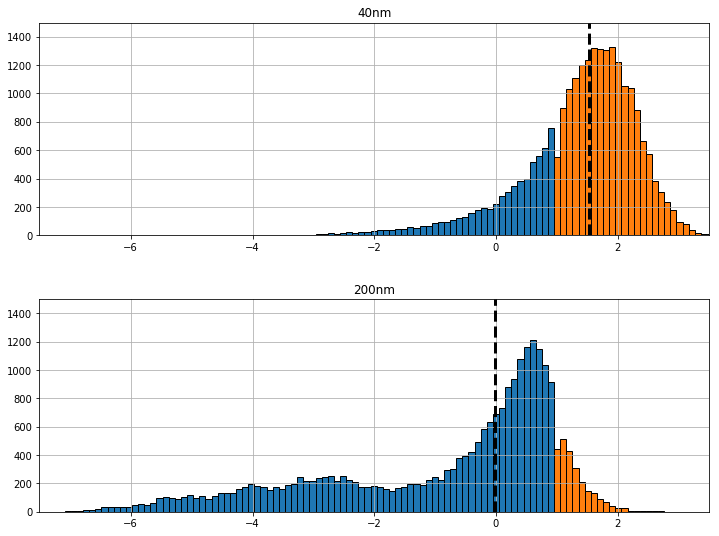

In [184]:
Dbins = [-10, 0.9877, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=2, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_train[X_train['Size']==sizes[counter]]['LogDeff1'].median())
    for i in range(2):
        X_train[(X_train['Size']==sizes[counter]) & (Dbins[i] < X_train['LogDeff1']) & (X_train['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 1500])
    ax.axvline(X_train[X_train['Size']==sizes[counter]]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(sizes[counter]+ 'nm')
    if counter == 2:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [185]:
y_pred2 = list(pd.cut(X_train.LogDeff1.values, bins=[-10, 0.9877, 1000], labels=['200', '40']).astype(str))
y_true2 = X_train['Size'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

        200     0.7697    0.8998    0.8297     24589
         40     0.8802    0.7323    0.7995     24728

avg / total     0.8251    0.8158    0.8145     49317



In [186]:
y_pred2 = list(pd.cut(X_test.LogDeff1.values, bins=[-10, 0.9877, 1000], labels=['200', '40']).astype(str))
y_true2 = X_test['Size'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

        200     0.7709    0.8925    0.8272     25578
         40     0.8690    0.7288    0.7927     25022

avg / total     0.8194    0.8116    0.8102     50600



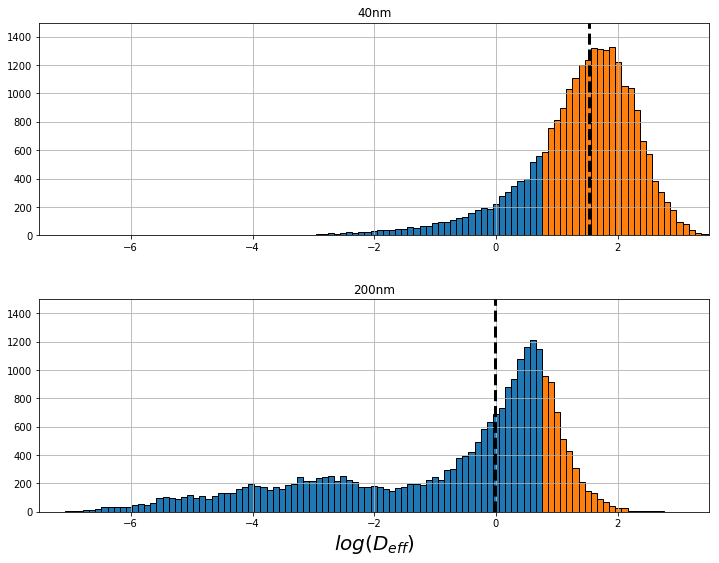

In [187]:
Dbins = [-10, 0.759, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=2, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_train[X_train['Size']==sizes[counter]]['LogDeff1'].median())
    for i in range(2):
        X_train[(X_train['Size']==sizes[counter]) & (Dbins[i] < X_train['LogDeff1']) & (X_train['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 1500])
    ax.axvline(X_train[X_train['Size']==sizes[counter]]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(sizes[counter]+ 'nm')
    if counter == 1:
        ax.set_xlabel(r'$log(D_{eff})$', size=20)
    counter = counter + 1

In [171]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[ 0.75869995]


In [188]:
y_pred2 = list(pd.cut(X_train.LogDeff1.values, bins=[-10, 0.7587, 1000], labels=['200', '40']).astype(str))
y_true2 = X_train['Size'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

        200     0.7995    0.8129    0.8062     24589
         40     0.8108    0.7973    0.8040     24728

avg / total     0.8052    0.8051    0.8051     49317



In [189]:
y_pred2 = list(pd.cut(X_test.LogDeff1.values, bins=[-10, 0.7587, 1000], labels=['200', '40']).astype(str))
y_true2 = X_test['Size'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

        200     0.8001    0.8102    0.8051     25578
         40     0.8034    0.7930    0.7982     25022

avg / total     0.8017    0.8017    0.8017     50600

